# Text Classification with BERT/RoBERTa and Simple Transformers

In [1]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import numpy as np
import logging
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix, classification_report
#from pylab import rcParams
import matplotlib.pyplot as plt
import pickle

In [2]:
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [3]:
model_types = {
    "bert": "cahya/bert-base-indonesian-522M", 
    "roberta":"cahya/roberta-base-indonesian-522M"}
model_name = "bert"

In [4]:
# The dataset can be downloaded from https://drive.google.com/open?id=1sCF0gNg5sFseZFD5LGJzdh5qzaMIv7Ip
# which belongs to https://github.com/andreaschandra/indonesian-news/
# and put it under the directory "/dataset/indonesian-news"

In [5]:
data = "/dataset/indonesian-news"

In [6]:
train = np.array(pickle.load(open(f'{data}/training.res', 'rb'))).T
test = np.array(pickle.load(open(f'{data}/testing.res', 'rb'))).T

In [7]:
df_train = pd.DataFrame(train, columns=["text", "labels"])
df_test = pd.DataFrame(test, columns=["text", "labels"])

In [8]:
class_names = ['bola', 'news', 'bisnis', 'tekno', 'otomotif']

In [9]:
for i, class_name in enumerate(class_names):
    print(i, class_name)
    df_train["labels"][df_train["labels"]==class_name] = i
    df_test["labels"][df_test["labels"]==class_name] = i

0 bola
1 news
2 bisnis
3 tekno
4 otomotif


In [10]:
df_train.head()

,text,labels
0,"Liputan6.com, London - Lee Dixon khawatir Arse...",0
1,"Liputan6.com, Jakarta - Kasus dugaan penganiay...",1
2,"Liputan6.com, Jakarta Menanggapi aksi eks peke...",2
3,"Liputan6.com, Medan - Sebanyak 81 kendaraan 4x...",0
4,"Liputan6.com, Jakarta Indonesia akan melawan T...",0


In [11]:
df_test.head()

,text,labels
0,"Liputan6.com, Bandung Persib Bandung akan menj...",0
1,"Liputan6.com, Jakarta - Mantan Ketua Mahkamah ...",1
2,"Liputan6.com, Cardiff - Tragedi yang menimpa E...",0
3,"Liputan6.com, Jakarta - Kementerian Kelautan d...",2
4,"Liputan6.com, Jakarta - PT Pertamina (Persero)...",2


In [12]:
# Optional model configuration
model_args = ClassificationArgs()
model_args.num_train_epochs = 5
model_args.train_batch_size = 128
model_args.eval_batch_size = 128
model_args.overwrite_output_dir = True
model_args.fp16 = True
model_args.do_lower_case = True

In [13]:
# Create a ClassificationModel
model = ClassificationModel(
    model_name, model_types[model_name], num_labels=len(class_names), args=model_args
)

In [14]:
# Train the model
model.train_model(df_train)

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.



Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 1.695097

/sysadmin/wirawan/miniconda3/envs/transformers/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:113: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running loss: 0.242626


Running loss: 0.302650

/sysadmin/wirawan/miniconda3/envs/transformers/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.292270


Running loss: 0.148392


Running loss: 0.155452


Running loss: 0.105422



INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.


In [15]:
# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(df_test)

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_model:{'mcc': 0.9084232230286101, 'eval_loss': 0.2115726492234639}


In [16]:
preds = np.argmax(model_outputs, axis=1)

In [17]:
accuracy = np.sum(df_test['labels']==preds)/len(preds)
accuracy

0.9345260753711458

In [18]:
df_test["text"][0]

'Liputan6.com, Bandung Persib Bandung akan menjalani laga kedua 32 besar di Piala Indonesia melawan Persiwa Wamena, Senin (11/2/2019) pukul 15.00 WIB. Jelang laga tersebut, ada yang berbeda dengan penampilan bek asal Serbia, Bojan Malisic.\n\nYa, Malisic terlihat sedikit berbeda saat sesi latihan tim di lapangan Sabuga Bandung, Jumat (8/2/2019). Jika biasanya ia berpenampilan dengan janggut tebal dan kumis yang biasa menghiasi wajahnya, kali ini dipotong habis oleh pemain 33 tahun itu.\n\nDitemui seusai latihan Persib, Malisic mengakui perubahan penampilan adalah hal biasa baginya. "Ini bukan hal yang berbeda, di sini panas dan saya tidak ingin menggaruk atau merasa gatal di brewok. Saya merasa lebih segar dengan begini," kata Mali, sapaan akarabnya.\n\nMali menampik anggapan jika selama berpenampilan brewok, ia menjadi lebih garang membentengi pertahanan Persib. "Saya pikir brewok saya tidak mempengaruhi kepercayaan diri saya," ujar pemain asal Serbia itu.\n\nNamun menurut mantan pema

In [19]:
# Make predictions with the model
predictions, raw_outputs = model.predict([df_test["text"][0]])

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


In [20]:
class_names[int(predictions[0])]

'bola'

In [21]:
preds.shape, df_test['labels'].shape

((2627,), (2627,))

In [22]:
print(classification_report(list(df_test['labels']), preds, target_names=class_names))

              precision    recall  f1-score   support

        bola       0.98      0.97      0.98       923
        news       0.93      0.93      0.93       880
      bisnis       0.88      0.90      0.89       542
       tekno       0.89      0.92      0.90       212
    otomotif       0.97      0.84      0.90        70

    accuracy                           0.93      2627
   macro avg       0.93      0.91      0.92      2627
weighted avg       0.94      0.93      0.93      2627



In [23]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True Topics')
    plt.xlabel('Predicted Topics');


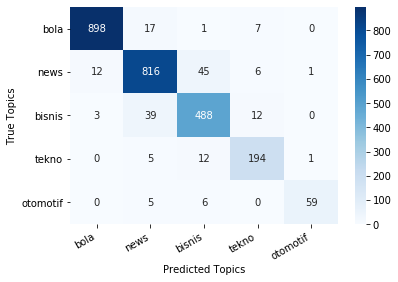

In [24]:
cm = confusion_matrix(list(df_test['labels']), preds)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [25]:
def evaluation(y_true, y_pred):
    f1score = f1_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')    
    cm = confusion_matrix(y_true, y_pred)    
    return f1score, recall, precision, cm

In [26]:
f1score, recall, precision, cm = evaluation(list(df_test['labels']), preds)

In [27]:
print(" f1-score: {}\n precision: {}\n recall: {}".format(f1score, precision, recall))

 f1-score: 0.9195136057899191
 precision: 0.9291713097750997
 recall: 0.9117015245953353
